<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-and-description-of-data" data-toc-modified-id="Loading-and-description-of-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading and description of data</a></span><ul class="toc-item"><li><span><a href="#Load-Dataset" data-toc-modified-id="Load-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Dataset</a></span></li><li><span><a href="#Checking-the-missing-values" data-toc-modified-id="Checking-the-missing-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Checking the missing values</a></span><ul class="toc-item"><li><span><a href="#Analysis-of-gaps-in-&quot;balance&quot;" data-toc-modified-id="Analysis-of-gaps-in-&quot;balance&quot;-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Analysis of gaps in "balance"</a></span></li><li><span><a href="#Analysis-of-gaps-in-&quot;age&quot;" data-toc-modified-id="Analysis-of-gaps-in-&quot;age&quot;-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Analysis of gaps in "age"</a></span></li></ul></li><li><span><a href="#Analysis-of-explicit-and-implicit-duplicates" data-toc-modified-id="Analysis-of-explicit-and-implicit-duplicates-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Analysis of explicit and implicit duplicates</a></span></li></ul></li><li><span><a href="#Descriptive-Statistical-Analysis" data-toc-modified-id="Descriptive-Statistical-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Descriptive Statistical Analysis</a></span><ul class="toc-item"><li><span><a href="#Numerical-variables" data-toc-modified-id="Numerical-variables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Numerical variables</a></span><ul class="toc-item"><li><span><a href="#Histogram-with-Frequencies" data-toc-modified-id="Histogram-with-Frequencies-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Histogram with Frequencies</a></span></li><li><span><a href="#Histogram-with-Densities-and-KDE-line-(kernel-density-estimate)" data-toc-modified-id="Histogram-with-Densities-and-KDE-line-(kernel-density-estimate)-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Histogram with Densities and KDE line (kernel density estimate)</a></span></li><li><span><a href="#Box-Plot" data-toc-modified-id="Box-Plot-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Box Plot</a></span></li><li><span><a href="#Statistical-metrics" data-toc-modified-id="Statistical-metrics-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Statistical metrics</a></span></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Correlation Analysis</a></span></li><li><span><a href="#Outliers-detection-using-Z-Score" data-toc-modified-id="Outliers-detection-using-Z-Score-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Outliers detection using Z-Score</a></span></li></ul></li><li><span><a href="#Categorical-Variables" data-toc-modified-id="Categorical-Variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Categorical Variables</a></span><ul class="toc-item"><li><span><a href="#Count-instances-for-each-categorical-column" data-toc-modified-id="Count-instances-for-each-categorical-column-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Count instances for each categorical column</a></span></li><li><span><a href="#Pie-Chart---Analysis-of-relative-frequencies" data-toc-modified-id="Pie-Chart---Analysis-of-relative-frequencies-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Pie Chart - Analysis of relative frequencies</a></span></li><li><span><a href="#Statistical-Analysis-for-subgroups" data-toc-modified-id="Statistical-Analysis-for-subgroups-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Statistical Analysis for subgroups</a></span></li></ul></li></ul></li></ul></div>

## Loading and description of data

**Description of the data:**

*/datasets/bank_scrooge.csv* - the dataset contains data about the clients of Metanprom Bank. The Bank is located in Yaroslavl and regional cities: Rostov Veliky and Rybinsk.

Columns:
- USERID — user ID,
- score — credit scoring scores,
- city — city,
- gender — gender,
- age — age,
- equity — the number of ownership points
- balance — account balance,
- products — the number of products that the customer uses,
- credit_card — is there a credit card,
- last_activity — active client,
- EST_SALARY — estimated income of the client,
- сhurn - is a sign of outflow.

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

!pip install phik -q
import phik

### Load Dataset

In [2]:
local_path = 'C:/Users/ydego/Downloads/bank_scrooge.csv'
server_path = 'https://code.s3.yandex.net/datasets/bank_scrooge.csv'

if os.path.exists(local_path):
    dataset = pd.read_csv(local_path)
elif os.path.exists(server_path):
    dataset = pd.read_csv(server_path)
else:
    print('The data file could not be found')

In [3]:
def explore_dataframe(df, table_name, print_head=5, print_info=True):
    
    print(f"Table analysis: {table_name}")
    
    # Вывод первых n строк
    print(f"The first {print_head} rows of the table:")
    display(df.head(print_head))
    
    # Вывод информации о DataFrame
    if print_info:
        print("\nInformation about the table:")
        df.info()
    
    # Анализ пропусков
    print("\nThe number and percentage of omissions in the dataframe:")
    missing_report = df.isna().sum().to_frame()
    missing_report = missing_report.rename(columns={0: 'missing_values'})
    missing_report['% of total'] = ((missing_report['missing_values'] / df.shape[0])*100).round(2)
    display(missing_report.sort_values(by='missing_values', ascending=False))
    
    # Анализ дубликатов
    print("\nThe number of explicit duplicates:", df.duplicated().sum())
    # Вычисление доли дубликатов
    print("\nThe proportion of duplicates:", "{:.2%}".format(df.duplicated().sum() / len(df)))
    # Анализ распределения численных значений
    print("\nDescriptive statistics of the table:")
    display(df.describe())



In [4]:
explore_dataframe(dataset, 'Information about the bank\'s customers')

Table analysis: Information about the bank's customers
The first 5 rows of the table:


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1



Information about the table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB

The number and percentage of omissions in the dataframe:


,missing_values,% of total
balance,2295,22.95
age,26,0.26
USERID,0,0.00
score,0,0.00
city,0,0.00
gender,0,0.00
equity,0,0.00
products,0,0.00
credit_card,0,0.00
last_activity,0,0.00



The number of explicit duplicates: 0

The proportion of duplicates: 0.00%

Descriptive statistics of the table:


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


In [5]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  10000
#Features =  12


There are 10,000 records and 12 columns in the dataset.

All columns are adjusted to the desired data type. The only thing is that the score and age columns can be converted to an integer data type instead of a real one, because credit scoring points and age cannot be non-integers.

Column names must be brought to a uniform style.

There are gaps in the data in only two columns - balance and age. There are no obvious duplicates in the data.

When studying descriptive statistics, abnormal values are observed in the column with the estimated income of the client (EST_SALARY) - the salary of 2.5 thousand is suspicious, because it is much less than the minimum wage, and the income of clients over a million is suspicious.

We will reduce all column names to lowercase and add an underscore in the name of the userid column.

In [6]:
dataset.columns = dataset.columns.str.lower()
dataset = dataset.rename(columns={'userid': 'user_id'})
display(dataset.columns)

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Checking the missing values

C:\Users\ydego\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


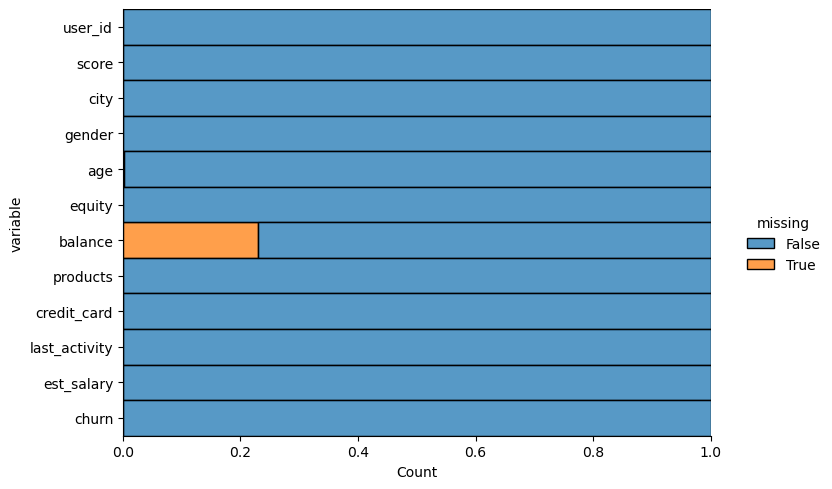

In [7]:
# plot missing data
sns.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

For the analysis and processing of omission, we will use the generally accepted classification of omissions:
        
- MCAR (Missing Completely At Random) — omissions do not depend on variables and do not lead to a systematic error (bias), but increase the random error (spread, variation), they can be discarded or filled in, because filling will not affect the nature of the relationship between the variable being filled in and the rest;
- MAR (Missing At Random) — within each of the groups that exist in the population described by the data, the distribution of omissions is random, they can be discarded;
- MNAR (Missing Not At Random) — omissions depend on the data, without additional justification they cannot be discarded or filled in with a single value, because this will lead to noticeable distortions.

Let's create a new attribute that takes 1 if the attribute value is omitted in the observation, and 0 if the attribute value is not omitted in the observation. Next, using the correlation matrix, let's see if there is a relationship between the new feature and other features of the table.

In order not to lose the original columns and not create a new one in the original dataframe, we will make a copy and work with it when analyzing omissions.

#### Analysis of gaps in "balance"

In [8]:
data_gaps=dataset.copy()
data_gaps = data_gaps.drop('user_id', axis=1)

In [9]:
# creating a new feature
data_gaps['balance'] = data_gaps['balance'].isnull().astype(int)

In [10]:
# Creating a correlation matrix
continuous_signs = ['score', 'age', 'balance', 'est_salary']

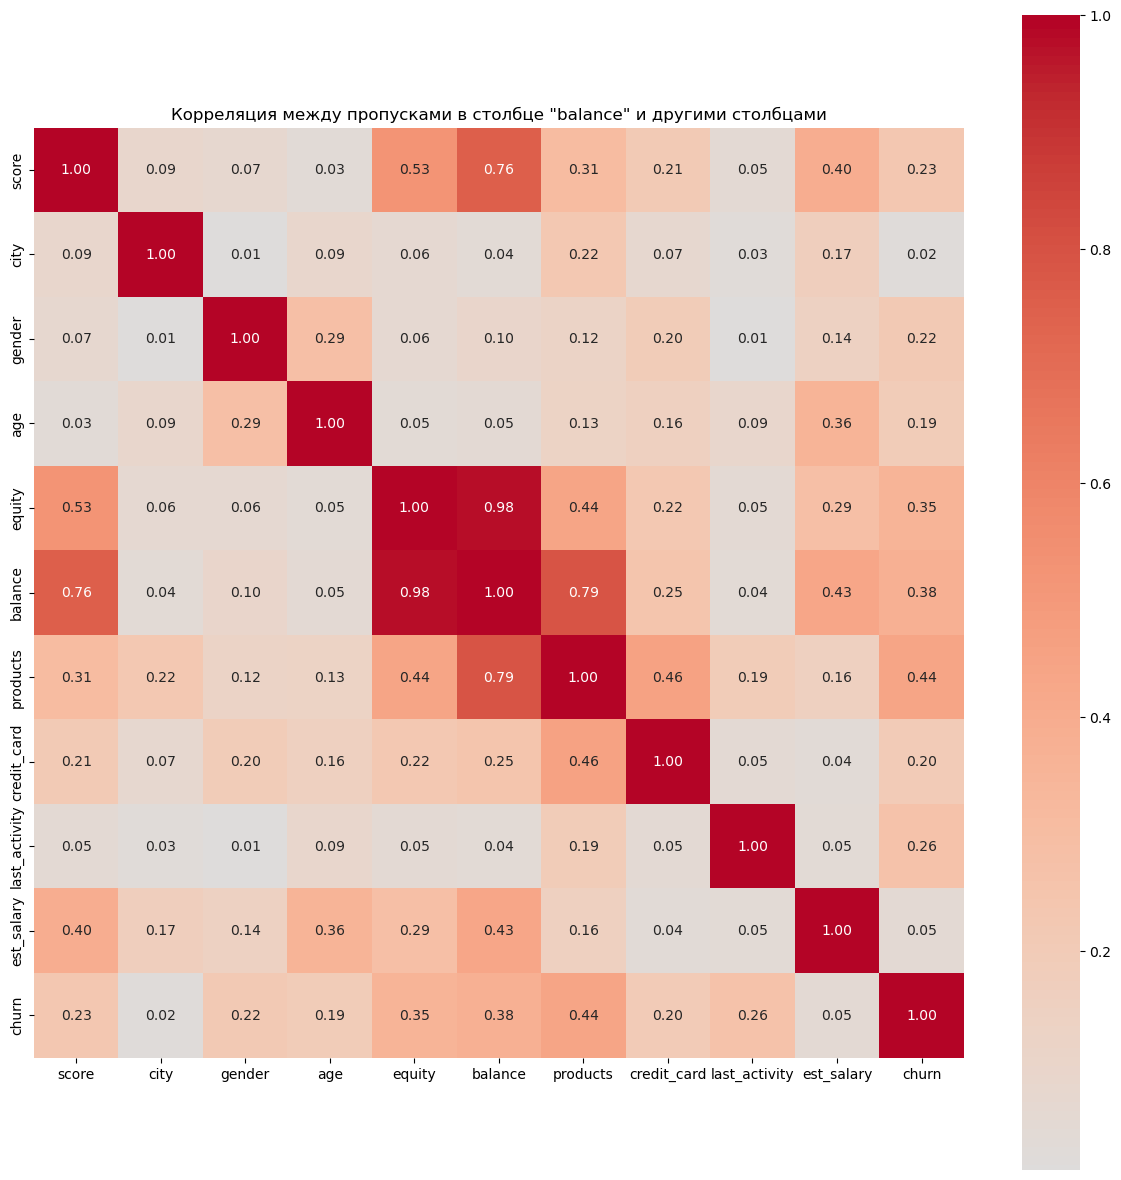

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(data_gaps.phik_matrix(interval_cols = continuous_signs),
            cmap='coolwarm',
            annot = True,
            fmt = '.2f',
            center=0,
            square=True)
plt.title('Correlation between omissions in the "balance" column and other columns')
plt.show()

Using Chaddock's scale, we can conclude that the gaps in the 'balance' column have a high dependence on the data in the 'equity', 'products' and 'score' columns.

Thus, `gaps in the 'balance' column` belong to the MNAR category and without additional justification they cannot be discarded or filled with one value, so we leave them `without change`.

#### Analysis of gaps in "age"

Similar to the previous point, we will create a copy of the dataframe and encode the gaps in the "age" column.

In [12]:
data_gaps_2=dataset.copy()
data_gaps_2 = data_gaps_2.drop('user_id', axis=1)

In [13]:
data_gaps_2['age'] = data_gaps_2['age'].isnull().astype(int)

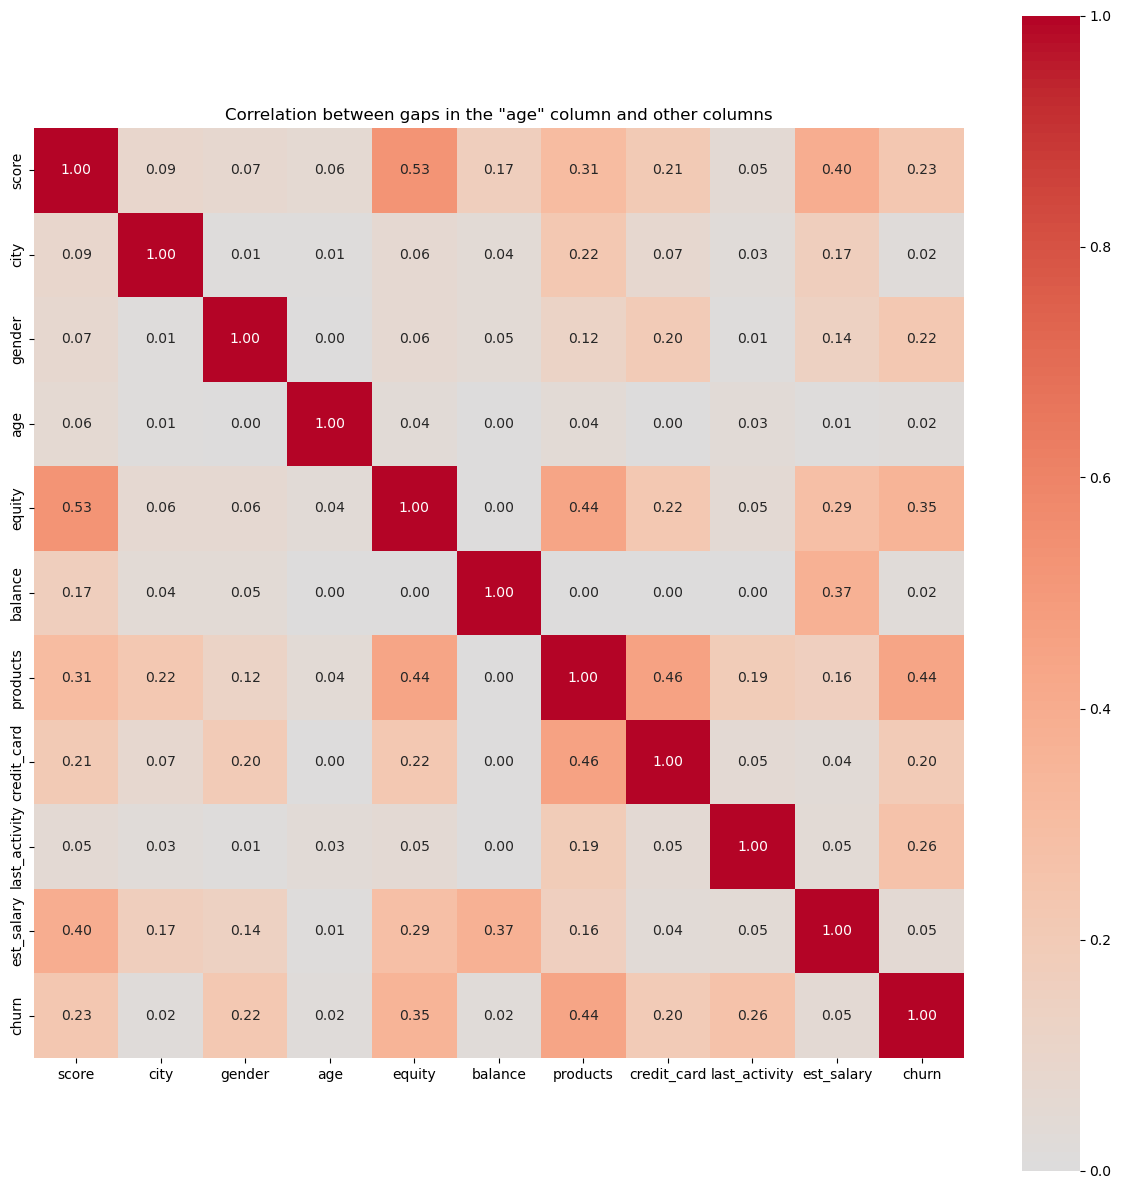

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(data_gaps_2.phik_matrix(interval_cols = continuous_signs),
            cmap='coolwarm',
            annot = True,
            fmt = '.2f',
            center=0,
            square=True)
plt.title('Correlation between gaps in the "age" column and other columns')
plt.show()

Using Chaddock's scale, we can conclude that the gaps in the 'age' column have no dependence on the data in the columns.

Thus, `gaps in the 'age'` column are MAR + and account for 0.26% of the total data in the dataframe, so we can safely `remove` them without losing any important information.

In [15]:
# remove gaps in age
dataset = dataset.dropna(subset=['age'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1013.0+ KB


### Analysis of explicit and implicit duplicates

During the initial study of the data, it was already significant that there were no obvious duplicates in the data, so we will check for the presence of implicit ones.

In [16]:
print('Number of implicit duplicates in the dataset:', dataset.duplicated(subset=['user_id']).sum())

Number of implicit duplicates in the dataset: 50


Let's output all 50 implicit duplicates for their study.

In [17]:
data_with_dupl = dataset[dataset.duplicated(subset=['user_id'])]
for id in data_with_dupl['user_id']:
    display(dataset.loc[dataset['user_id']==id])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
1583,190253,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
869,210662,962.0,Ярославль,Ж,54.0,5,5069231.39,1,1,1,955144.85,1
1837,210662,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
904,131419,934.0,Ярославль,М,35.0,5,2348335.95,2,0,0,217105.13,1
2138,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1740,220816,840.0,Ярославль,Ж,41.0,3,1193287.13,2,1,1,76434.94,1
2302,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1513,208081,873.0,Ярославль,М,31.0,2,232814.75,2,1,1,122505.86,1
2998,208081,821.0,Рыбинск,Ж,62.0,3,493608.26,2,1,1,33491.45,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
790,170312,901.0,Ярославль,М,33.0,4,3276783.93,3,0,1,358700.96,1
3039,170312,813.0,Рыбинск,Ж,47.0,3,370027.67,2,0,0,129835.56,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
3106,185748,912.0,Ярославль,Ж,47.0,5,1598218.98,2,0,0,180256.98,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1359,211130,833.0,Ярославль,М,55.0,3,1231184.9,4,0,1,187758.38,1
3817,211130,918.0,Рыбинск,Ж,55.0,0,NaN,2,1,1,244202.04,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1970,217643,845.0,Ярославль,М,29.0,5,733098.45,4,1,1,41443.01,1
4186,217643,804.0,Рыбинск,Ж,40.0,2,301836.65,2,1,1,81137.22,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
4216,226719,903.0,Рыбинск,Ж,63.0,0,NaN,1,1,0,138582.58,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1
4870,197364,889.0,Ярославль,М,33.0,0,NaN,2,1,1,96173.48,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3274,155765,863.0,Ярославль,М,30.0,5,1036114.5,5,1,1,150744.5,1
5197,155765,923.0,Рыбинск,М,30.0,0,NaN,1,1,1,120296.6,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4850,126368,909.0,Ярославль,Ж,30.0,4,1322623.29,2,0,1,140675.66,1
5420,126368,832.0,Рыбинск,Ж,33.0,0,NaN,1,0,0,118465.34,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5369,143592,885.0,Рыбинск,Ж,56.0,4,1201087.46,2,1,1,88223.89,1
5557,143592,764.0,Ярославль,Ж,68.0,3,508919.15,2,0,1,71211.66,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2276,141265,858.0,Ярославль,М,37.0,4,471599.16,2,1,1,148806.88,1
5569,141265,811.0,Рыбинск,Ж,33.0,3,1044316.88,2,1,0,46055.32,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3350,208815,877.0,Рыбинск,М,25.0,4,239421.18,1,1,1,48638.00,1
5570,208815,773.0,Ярославль,М,39.0,4,288110.09,2,1,0,56971.91,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
690,152479,768.0,Рыбинск,Ж,42.0,0,126787.79,4,1,1,143233.23,1
5705,152479,723.0,Ярославль,Ж,22.0,0,NaN,1,1,0,83955.65,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4611,217619,903.0,Рыбинск,Ж,59.0,5,844055.83,2,0,1,133999.76,1
5807,217619,766.0,Ярославль,М,52.0,2,218199.47,1,1,0,120356.44,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1580,208738,897.0,Рыбинск,Ж,45.0,5,859018.19,2,1,1,145510.08,1
5840,208738,839.0,Ярославль,М,60.0,5,1102438.37,2,0,1,116500.81,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5454,188957,853.0,Ярославль,М,35.0,1,374959.62,2,1,1,197600.97,1
6005,188957,882.0,Рыбинск,Ж,64.0,3,893392.91,3,1,0,69622.58,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2941,172142,896.0,Ярославль,Ж,30.0,4,1009073.14,4,1,0,70866.29,1
6756,172142,751.0,Рыбинск,Ж,69.0,3,396568.03,2,0,1,45608.45,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3564,163207,853.0,Рыбинск,М,42.0,4,543839.62,1,1,1,105281.97,1
6786,163207,838.0,Ярославль,Ж,42.0,4,652776.60,2,1,1,97545.36,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
7271,164676,790.0,Рыбинск,Ж,77.0,1,111202.01,1,1,0,32835.45,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1608,140377,802.0,Ярославль,М,26.0,3,539863.29,4,1,1,112167.83,1
7487,140377,930.0,Рыбинск,Ж,34.0,5,1123967.02,1,1,1,148336.26,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4986,210792,884.0,Рыбинск,М,48.0,4,2228037.20,2,0,1,207978.09,1
7814,210792,839.0,Ярославль,М,42.0,2,662646.97,1,1,0,138403.60,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3859,191520,773.0,Рыбинск,М,36.0,3,1219918.08,4,1,1,119933.13,1
7931,191520,767.0,Ярославль,М,45.0,0,NaN,1,1,1,880005.05,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
946,149365,877.0,Ярославль,М,41.0,5,819182.01,2,0,0,212316.47,1
8272,149365,793.0,Рыбинск,Ж,61.0,0,476496.99,2,1,1,46147.06,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5252,148826,895.0,Ярославль,М,32.0,5,1470273.14,2,0,0,118058.52,1
8364,148826,909.0,Рыбинск,Ж,32.0,0,NaN,3,1,0,28843.54,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7453,210627,864.0,Ярославль,Ж,38.0,4,1527225.32,4,1,1,162999.17,1
8521,210627,804.0,Рыбинск,М,30.0,2,347818.88,3,1,0,129015.25,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2989,181526,918.0,Ярославль,Ж,37.0,5,1366382.35,4,1,1,97932.95,1
8705,181526,895.0,Рыбинск,М,29.0,0,NaN,1,1,1,124786.53,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5629,162053,921.0,Рыбинск,М,33.0,3,857011.13,2,1,1,113512.57,1
8733,162053,786.0,Ярославль,М,29.0,4,205824.97,3,1,0,121371.73,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2499,199312,948.0,Ярославль,М,41.0,5,3095721.85,4,1,1,307234.69,1
8822,199312,911.0,Рыбинск,Ж,43.0,0,NaN,2,1,1,152189.72,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8584,183510,922.0,Ярославль,М,26.0,5,448542.42,3,0,1,66063.13,1
9146,183510,800.0,Рыбинск,Ж,42.0,7,473293.81,2,1,0,54049.88,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9035,200863,933.0,Рыбинск,М,29.0,7,766924.56,2,0,1,89323.33,1
9175,200863,832.0,Ярославль,М,42.0,5,620064.73,2,0,0,188054.46,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2439,150667,813.0,Рыбинск,Ж,44.0,0,62504.47,4,1,0,152393.79,1
9267,150667,931.0,Ярославль,М,41.0,0,NaN,1,0,0,261904.44,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1080,155872,896.0,Ярославль,М,36.0,3,1113656.92,3,0,1,291176.85,1
9363,155872,714.0,Рыбинск,Ж,29.0,0,NaN,1,1,0,118052.84,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4623,217826,842.0,Ярославль,М,39.0,4,439747.65,2,0,1,116736.75,1
9406,217826,790.0,Рыбинск,Ж,46.0,4,430414.80,2,1,1,49400.37,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3988,129785,904.0,Рыбинск,М,33.0,5,2427737.6,3,0,1,188856.75,1
9504,129785,949.0,Ярославль,М,43.0,0,NaN,1,1,1,166845.37,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3936,160075,899.0,Ярославль,М,34.0,4,1647814.67,4,1,0,151888.42,1
9508,160075,824.0,Рыбинск,Ж,57.0,3,355047.33,2,0,0,64351.81,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4587,171751,874.0,Рыбинск,Ж,26.0,5,292054.42,2,0,1,20528.56,1
9653,171751,862.0,Ярославль,М,42.0,4,481992.19,2,1,0,71816.86,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2226,195884,906.0,Ярославль,М,49.0,6,1354552.83,2,0,0,270678.42,1
9659,195884,767.0,Рыбинск,Ж,45.0,1,335652.56,3,1,1,100197.67,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5020,168998,886.0,Ярославль,Ж,35.0,4,394780.61,2,1,1,510577.10,1
9785,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7055,217412,879.0,Рыбинск,М,42.0,5,568140.15,3,0,0,231658.67,1
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7753,175730,846.0,Ярославль,Ж,32.0,7,216764.74,4,1,1,77100.85,1
9970,175730,816.0,Рыбинск,М,36.0,4,477892.07,3,1,0,81100.60,0


After analyzing all 50 `implicit duplicates`, it was found that `they cannot be deleted`. All lines with the same user_id have some differences, at least in each of them the city of the bank is different.

user_id should be a unique client identifier, but the overlap could occur, for example, if banks gave new clients the number of a client who had already left, without deleting information about him.

Since we do not need the 'user_id' column for further research, then for convenience we will create a copy of the original dataframe, remove this column from there and use the new dataframe.

In [18]:
# Create a new dataframe without the 'user_id' column
dataset = dataset.drop('user_id', axis=1)
dataset

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


## Descriptive Statistical Analysis

### Numerical variables

In [19]:
# list of numerical variables 
numerical_cols = ['score', 'age', 'balance', 'est_salary']

#### Histogram with Frequencies

In [20]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sns.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)    
    plt.show()

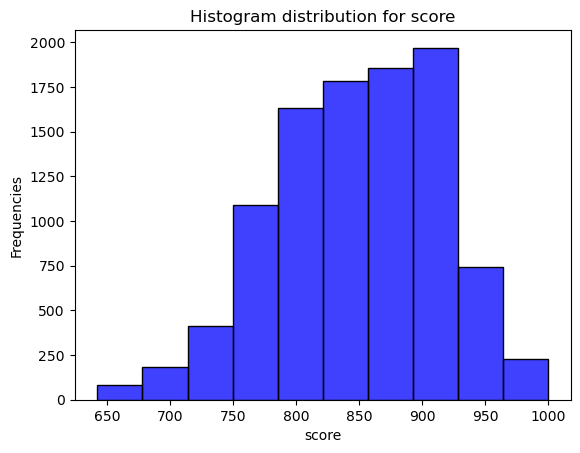

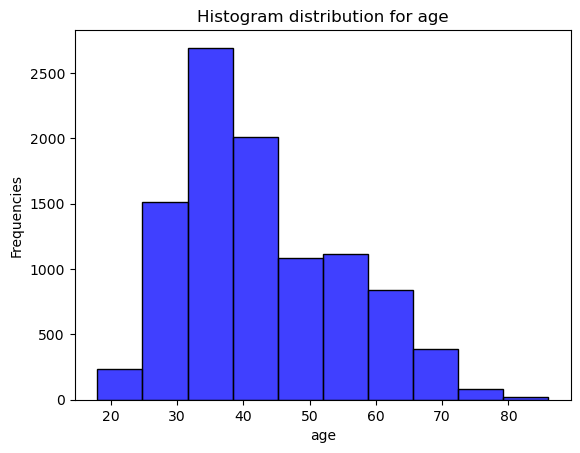

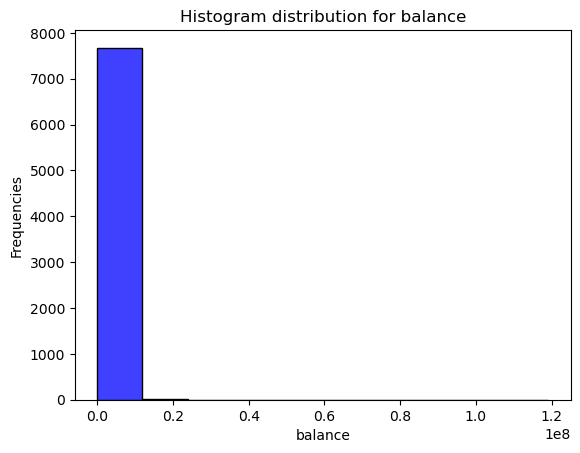

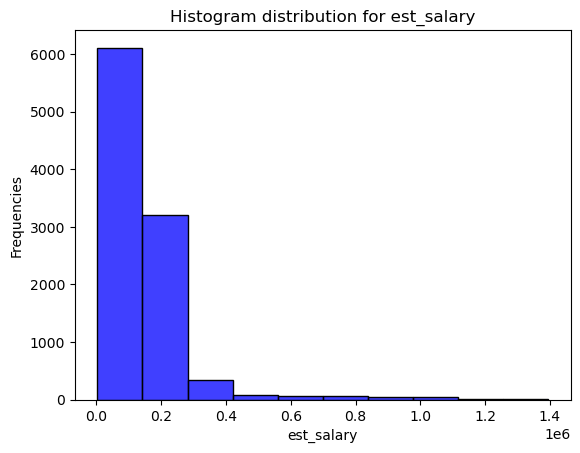

In [21]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

Here we have plotted a distribution for each numerical column. It shows the most frequent values for each column.

#### Histogram with Densities and KDE line (kernel density estimate)

In [22]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sns.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sns.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)    
    plt.show()

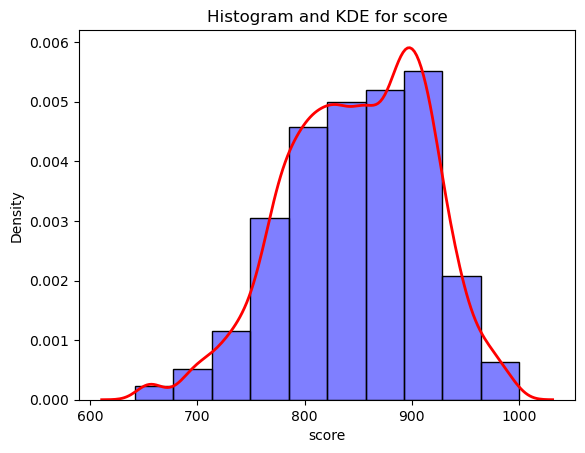

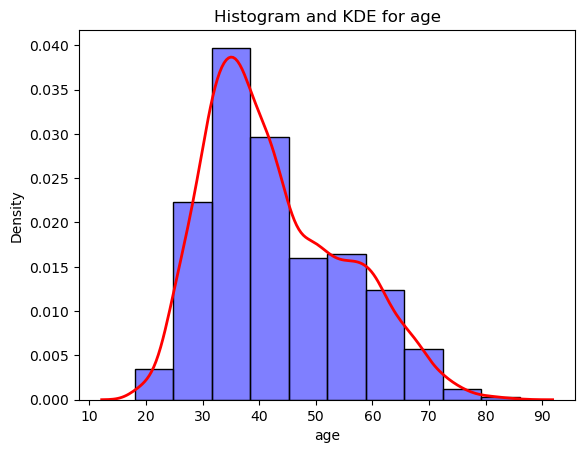

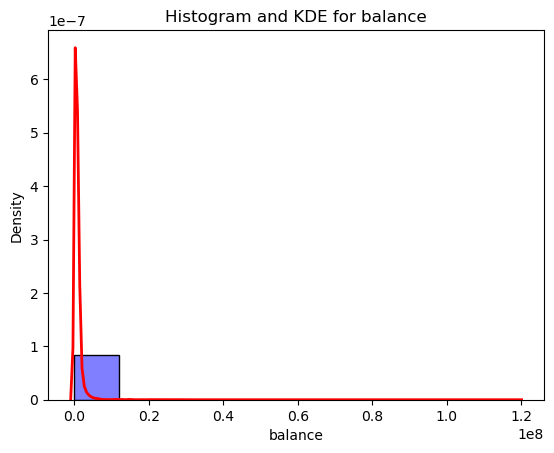

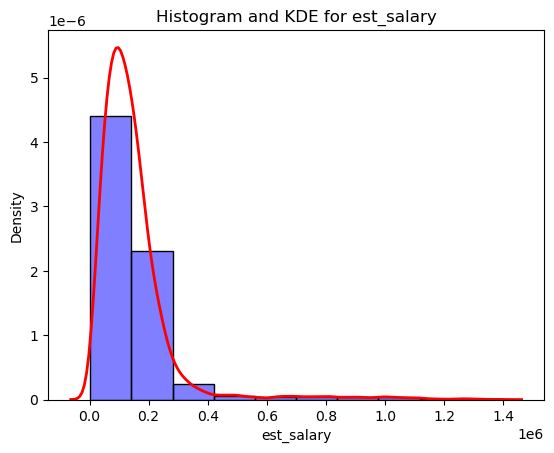

In [23]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

In addition to the distribution graph, in these figures we get a smooth curve representing the distribution of data points based on an estimate of the probability density function of a random variable. With this curve, we can easily see the obvious outliers in the data.

For example, there are a lot of single large values in the columns 'balance' and 'estimated income', so the curve goes along the graph close to zero values.

#### Box Plot

In [24]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 2
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (12, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sns.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

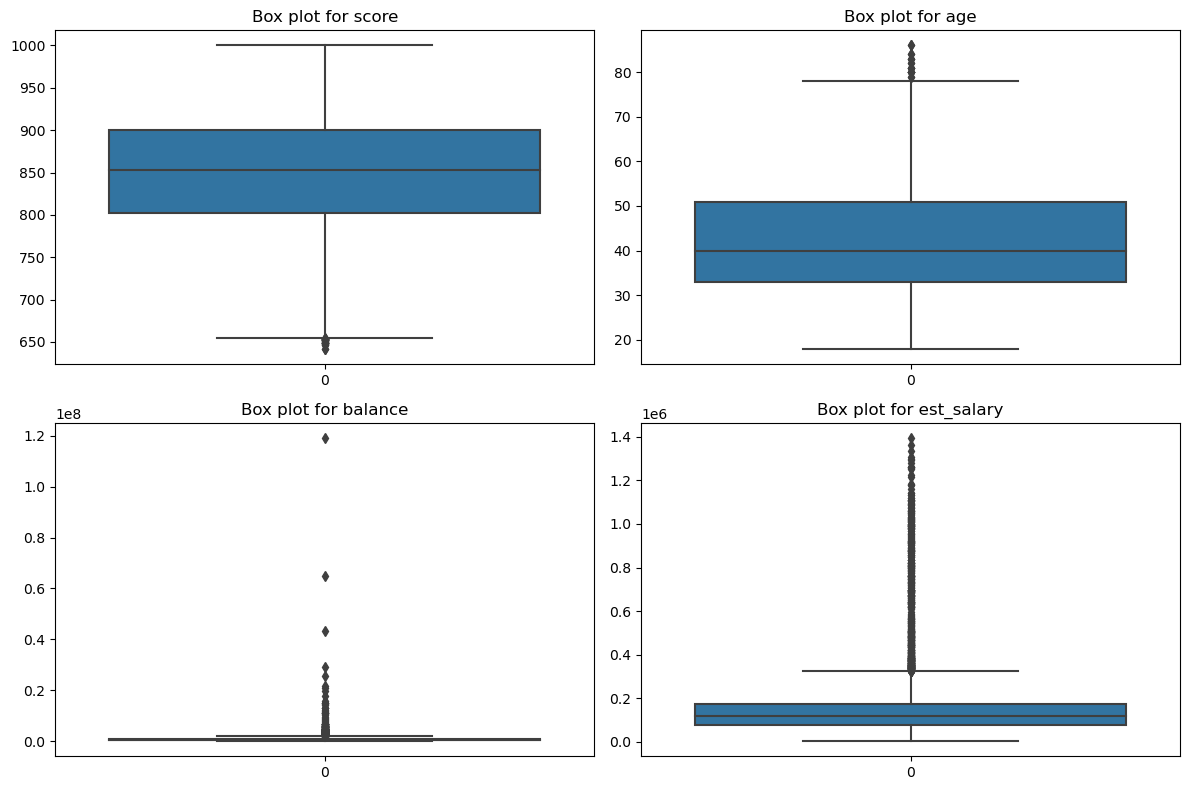

In [25]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

A box plot or "box and whisker" helps you see the median and quartiles.
The "box" is bounded by the first and third quartiles, that is, data in the range of 25%-75%. The median is indicated inside the box.

The "whiskers" extend to the left and right of the box boundaries at a distance equal to 1.5 interquartile ranges (IQR). The "whiskers" span normal values, and outliers, shown as dots, are outside the "whiskers". If the right "whisker" is longer than the maximum, then it ends with the maximum. The same is true for the minimum and the left "whisker".


The Box plots show:
- there are outliers in the "score" column, but there are not many of them. They are below the value of 655;
- for "age", the abnormal values are age above 78. There are also not many outliers here;
- there are a lot of outliers in the "balance" column and they are very large, so the box itself looks flattened;
- there are also a lot of outliers in the "est_salary", these values are about above 320 thousand.


#### Statistical metrics

In [26]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,score,age,balance,est_salary
count,9974.000000,9974.000000,7.695000e+03,9.974000e+03
mean,848.682575,42.734409,8.272456e+05,1.477868e+05
std,65.399720,12.179971,1.980327e+06,1.392855e+05
min,642.000000,18.000000,0.000000e+00,2.546300e+03
25%,802.000000,33.000000,2.956987e+05,7.525166e+04
50%,853.000000,40.000000,5.242953e+05,1.196268e+05
75%,900.000000,51.000000,9.800512e+05,1.744998e+05
max,1000.000000,86.000000,1.191136e+08,1.395064e+06


It would be good to record the nuances of distribution noticeable on the histogram in numbers: have the average, median, number of observations in the sample and the spread of their values at hand. Such characteristics, giving an idea of the sample, are included in the numerical description of the data. Using the describe() method, we obtain characteristics that give an idea of the sample; in fact, we record the nuances of distribution noticeable on the histogram in numbers.

Standard deviation — characterizes the spread of values and shows how much the values in the sample differ from the arithmetic mean. It is the standard deviation that allows us to understand the nature of the distribution and find out how homogeneous the values are. A sample where all values are close to the average will be characterized by a small standard deviation. If the standard deviation is large, there may be serious anomalies or outliers in the data set.

#### Correlation Analysis

In [27]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

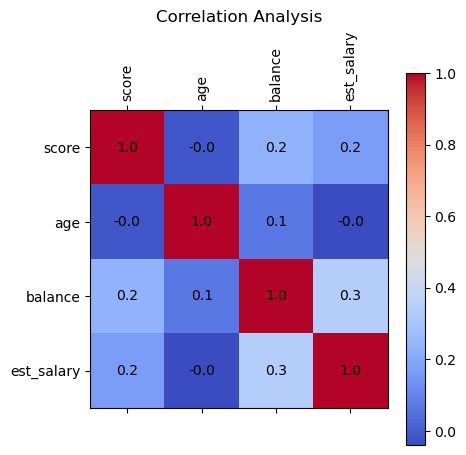

In [28]:
plot_correlation(dataset, numerical_cols)

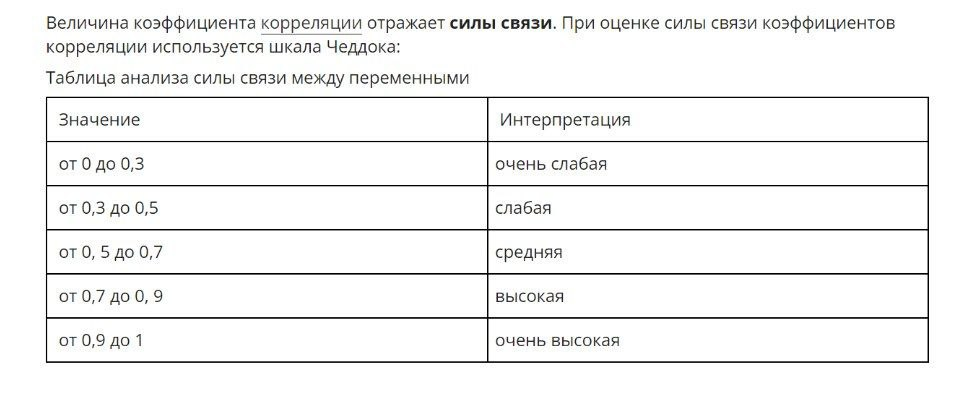

After analyzing the Cheddock scale, we can say that the data do not correlate well with each other. The columns "est_salary" and "balance" have a "weak" dependence, there is a "Very weak" dependence between the other columns.

#### Outliers detection using Z-Score

In [29]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):    
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)
    
    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

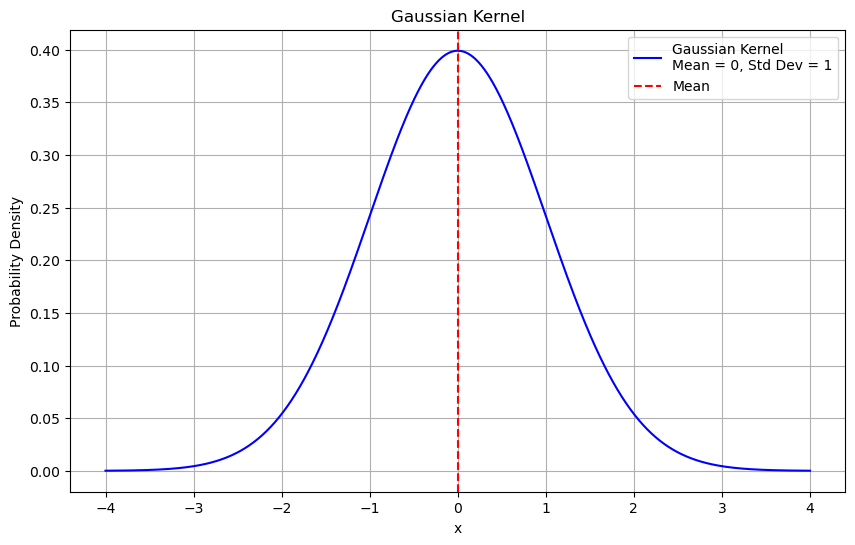

In [30]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)

In [31]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile


In [32]:
call_percentile(z = -2)

2.275

In [33]:
# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [34]:
outliers_detection(dataset, "age").head(5)

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
46,921.0,Ярославль,Ж,72.0,1,NaN,1,1,0,253494.70,0
60,944.0,Ярославль,Ж,71.0,0,NaN,2,0,1,107801.19,0
98,838.0,Ярославль,Ж,73.0,4,753022.09,2,0,0,41984.51,0
180,761.0,Рыбинск,Ж,21.0,1,8881.01,2,1,1,60353.55,0
219,754.0,Ярославль,Ж,80.0,1,332616.82,3,0,1,114804.27,0


In [35]:
outliers_detection(dataset, "est_salary").head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
30,946.0,Ярославль,Ж,47.0,0,NaN,2,1,1,660015.85,0
44,935.0,Ярославль,М,41.0,5,3781118.22,2,1,0,761349.20,0
55,820.0,Ростов,М,34.0,2,237691.16,2,1,0,23243.72,0
107,985.0,Рыбинск,Ж,41.0,4,6749773.07,2,1,0,698013.27,0
112,841.0,Ярославль,Ж,69.0,3,431061.20,1,1,0,19948.95,0


In [36]:
outliers_detection(dataset, "balance").head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
28,776.0,Ярославль,М,26.0,1,49105.63,1,1,1,38234.94,0
44,935.0,Ярославль,М,41.0,5,3781118.22,2,1,0,761349.20,0
84,785.0,Рыбинск,Ж,32.0,0,35867.00,1,1,0,140486.76,0
107,985.0,Рыбинск,Ж,41.0,4,6749773.07,2,1,0,698013.27,0


In [37]:
outliers_detection(dataset, "score").head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
99,971.0,Ярославль,М,45.0,4,322973.24,2,1,0,167678.82,0
107,985.0,Рыбинск,Ж,41.0,4,6749773.07,2,1,0,698013.27,0
124,686.0,Рыбинск,Ж,33.0,0,NaN,1,1,1,518488.59,0
125,1000.0,Ярославль,М,32.0,5,19757180.85,2,1,1,1024626.50,0
171,975.0,Ярославль,Ж,45.0,3,1039431.68,2,1,1,103750.62,0


In [38]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in score ***
#samples outlier to distribution = 449
%outliers = 4.5 %

*** Outliers detection in age ***
#samples outlier to distribution = 356
%outliers = 3.57 %

*** Outliers detection in balance ***
#samples outlier to distribution = 352
%outliers = 3.53 %

*** Outliers detection in est_salary ***
#samples outlier to distribution = 454
%outliers = 4.55 %


The largest number of outliers is in the est_salary column (4.55%), with a small difference is the score column (4.5%), in third place is the age column (3.57%) and with the least outliers among the numerical variables is balance (3.53%).

### Categorical Variables

In [39]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['city',
 'equity',
 'gender',
 'churn',
 'last_activity',
 'products',
 'credit_card']

#### Count instances for each categorical column

In [40]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** city ******
city
Ярославль    5875
Рыбинск      2683
Ростов       1416
Name: count, dtype: int64

***** equity ******
equity
0    2576
5    1915
4    1847
3    1541
2    1051
1     773
6     161
7      80
8      17
9      13
Name: count, dtype: int64

***** gender ******
gender
М    4991
Ж    4983
Name: count, dtype: int64

***** churn ******
churn
0    8155
1    1819
Name: count, dtype: int64

***** last_activity ******
last_activity
1    5215
0    4759
Name: count, dtype: int64

***** products ******
products
2    5119
1    3323
3    1038
4     474
5      19
0       1
Name: count, dtype: int64

***** credit_card ******
credit_card
1    6784
0    3190
Name: count, dtype: int64


Here we can see the most frequent values of categorical variables and make a portrait of the most popular user based on them.

- equity - 0    
- last_activity - 1    
- credit_card - 1    
- churn - 0    
- gender - M    
- products - 2    
- city - Yaroslavl

#### Pie Chart - Analysis of relative frequencies

In [41]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sns.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

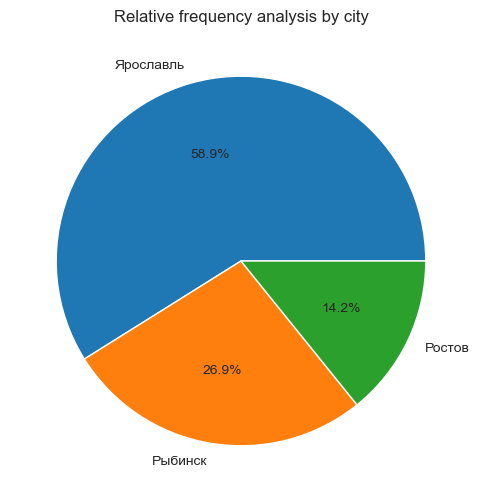

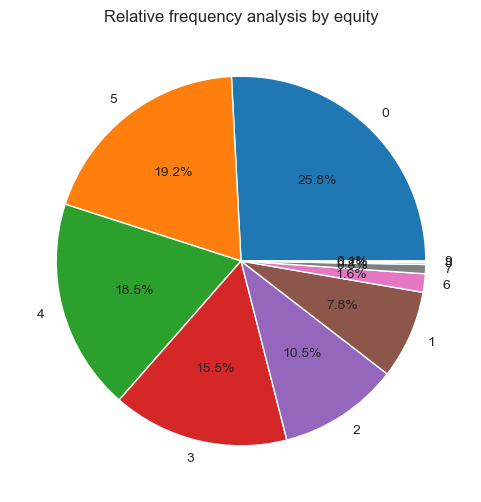

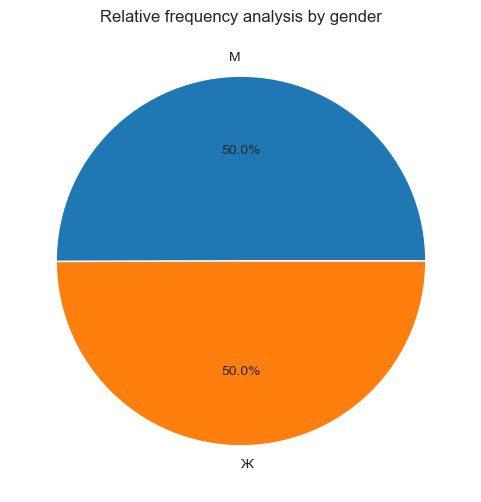

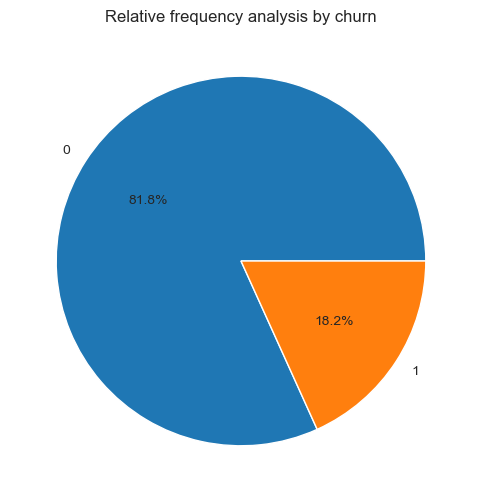

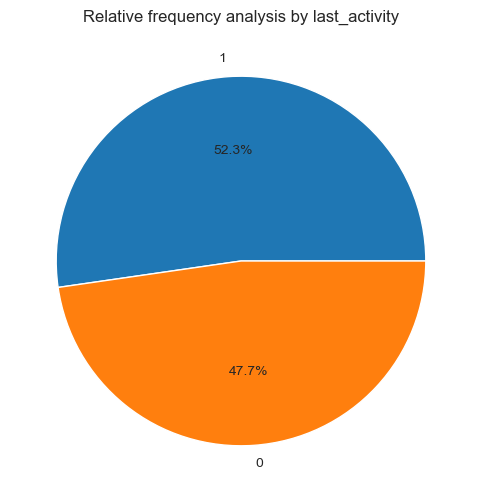

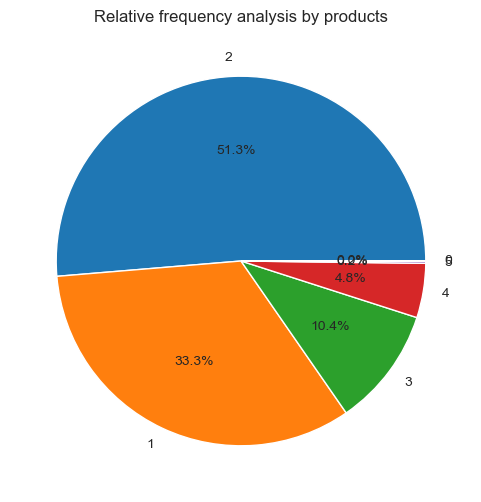

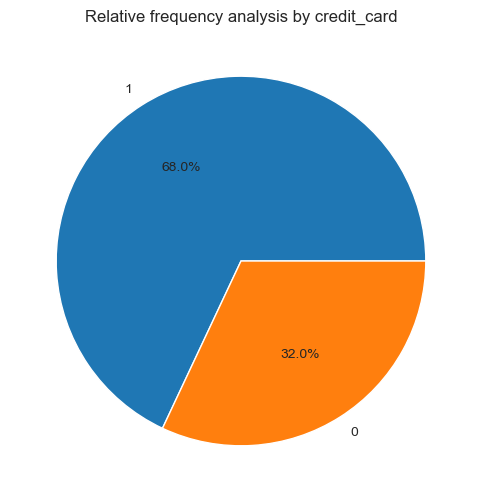

In [42]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

This type of visualization more clearly demonstrates how categorical values are distributed, showing their percentage value from the total number.

- equity - 0 (25.8%)   
- last_activity - 1 (52.3%)   
- credit_card - 1 (68%)  
- churn - 0 (81.8%)
- gender - M (50%)
- products - 2 (51.3%)
- city - Yaroslavl (58.9%)

In [43]:
# Histogram of absolute frequencies for categorical variables
def plot_categorical_histogram(dataset, column_name):
    category_counts = dataset[column_name].value_counts()
    plt.figure(figsize=(8, 6))
    category_counts.plot(kind='bar')
    plt.xticks(rotation=0)
    plt.title(f'Distribution by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()

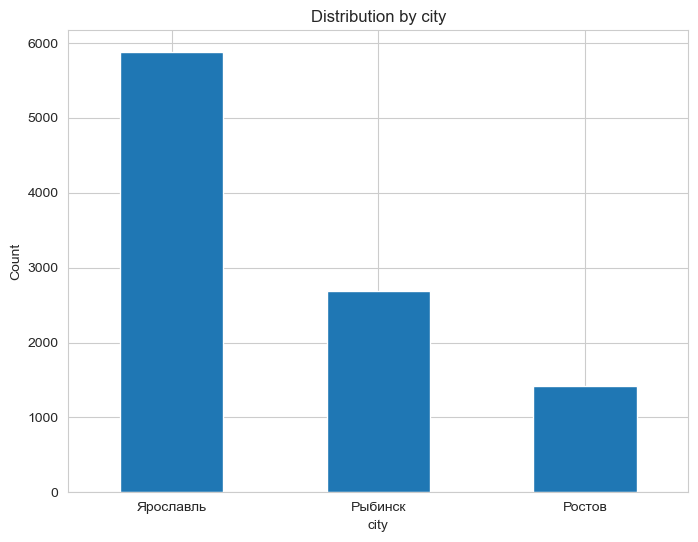

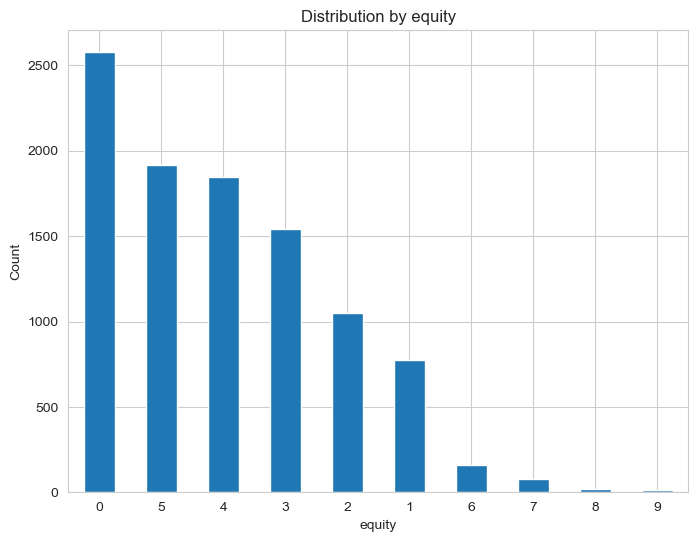

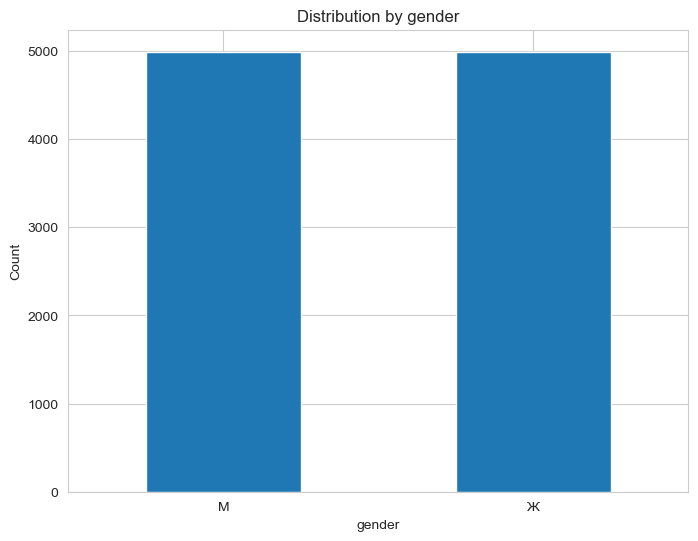

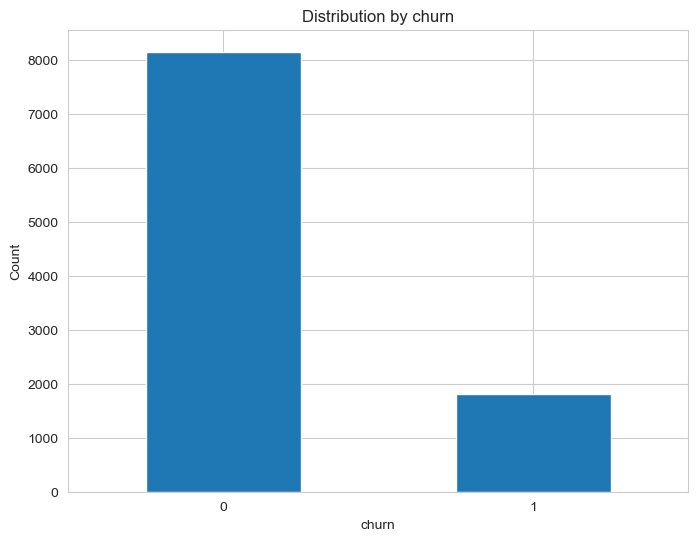

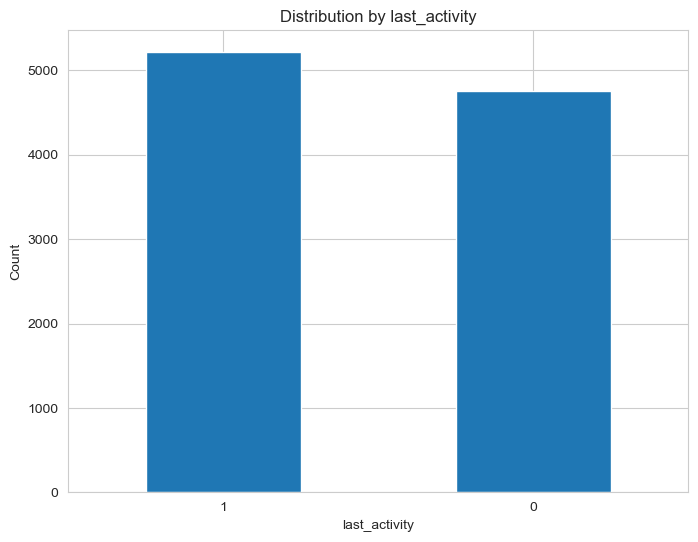

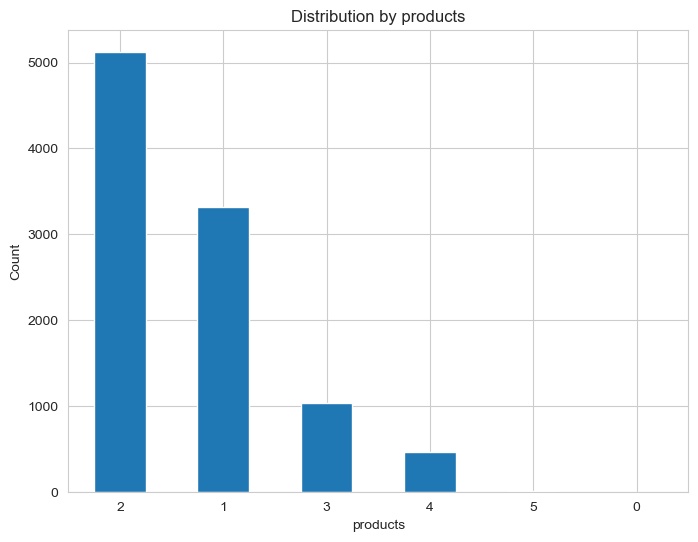

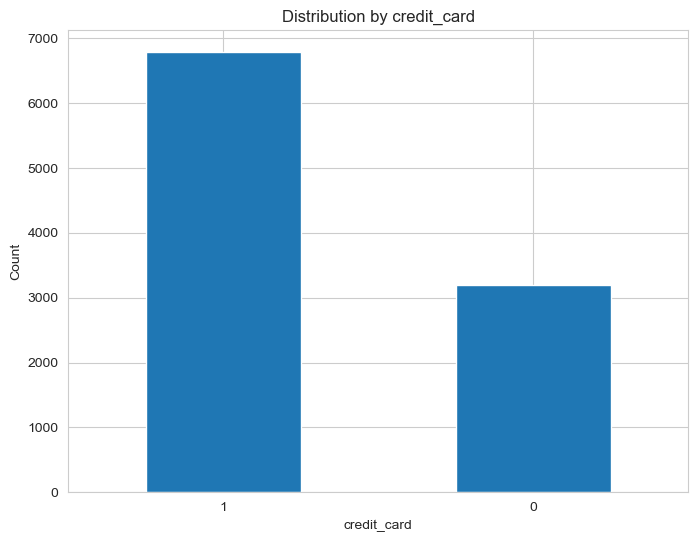

In [44]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_categorical_histogram(dataset, col)

#### Statistical Analysis for subgroups

In [45]:
# create groups organized by gender and city
group_sex_income = dataset.groupby(["gender", "city"]).size().reset_index(name = "samples")
print(group_sex_income)

  gender       city  samples
0      Ж     Ростов      733
1      Ж    Рыбинск     1374
2      Ж  Ярославль     2876
3      М     Ростов      683
4      М    Рыбинск     1309
5      М  Ярославль     2999


We got six groups. The distribution of males and females in cities is almost the same.

In [46]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sns.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Sex')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Sex and Salary')
    plt.tight_layout()
    plt.show()

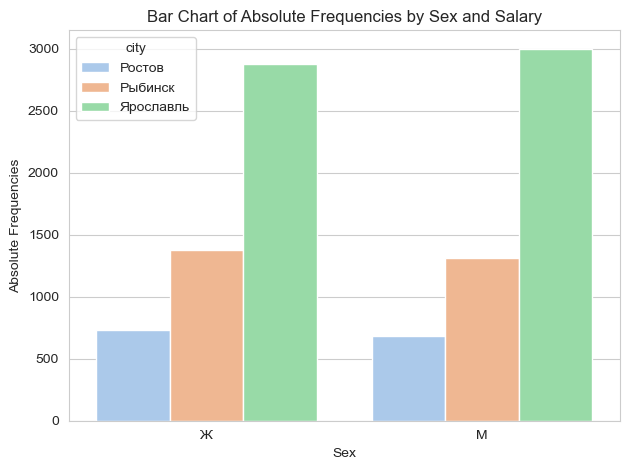

In [47]:
plot_absfreq_groups(group_sex_income, "gender", "city")

Most of the men and women are from Yaroslavl, followed by Rybinsk and Rostov.

In [48]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with salary " + group[g2]
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by gender and city')
    plt.show()

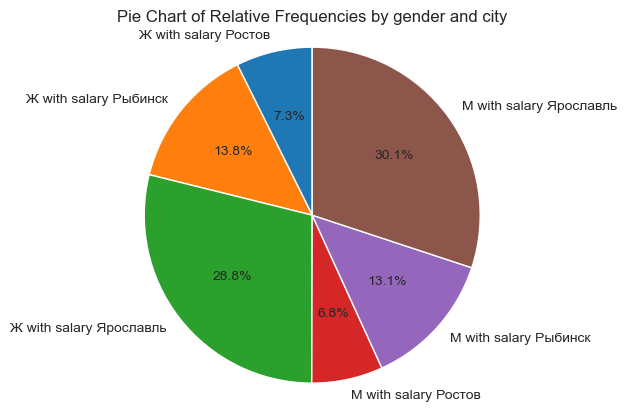

In [49]:
plot_relfreq_groups(group_sex_income, "gender", "city")

The largest share is occupied by men from Yaroslavl, followed by women from the same city. Men from Rostov are in last place.